In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_ = pd.read_csv("players_22.csv", low_memory=False)

In [3]:
df = df_.copy()

In [4]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(20, 16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [5]:
df.nunique()

sofifa_id                      19239
player_url                     19239
short_name                     18145
long_name                      19219
player_positions                 674
overall                           47
potential                         46
value_eur                        252
wage_eur                         133
age                               29
dob                             6312
height_cm                         49
weight_kg                         58
club_team_id                     701
club_name                        701
league_name                       55
league_level                       5
club_position                     29
club_jersey_number                99
club_loaned_from                 334
club_joined                     1845
club_contract_valid_until          9
nationality_id                   163
nationality_name                 163
nation_team_id                    33
nation_position                   28
nation_jersey_number              28
p

In [6]:
df.head(20)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [7]:
df.shape

(19239, 110)

In [8]:
2132 + 17107

19239

In [9]:
df.isnull().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

# Yeni Kolonlar Oluşturma ve Silme İşlemleri

In [10]:
url_drop = [col for col in df.columns if "url" in col]

In [11]:
df.drop(url_drop,axis=1,inplace=True)

In [12]:
df["first_position"] = df["player_positions"].apply(lambda x: x.split(",")[0])

In [13]:
df["multi_position"] = df["player_positions"].apply(lambda x: 1 if "," in x else 0)

In [14]:
df["multi_position"].head()

0    1
1    0
2    1
3    1
4    1
Name: multi_position, dtype: int64

In [15]:
df[["multi_position","player_positions"]].head()

,multi_position,player_positions
0,1,"RW, ST, CF"
1,0,ST
2,1,"ST, LW"
3,1,"LW, CAM"
4,1,"CM, CAM"


In [16]:
df.groupby("multi_position").agg({"value_eur":"mean"})

,value_eur
multi_position,
0,2.455337e+06
1,3.230163e+06


In [17]:
zero_value = df.loc[(df["multi_position"]==0),"value_eur"]
one_value = df.loc[(df["multi_position"]==1),"value_eur"]

In [18]:
pg.ttest(zero_value,one_value)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.065661,19095.610166,two-sided,1.653592e-12,"[-989769.9, -559880.66]",0.101897,1.073e+09,1.0


In [19]:
result = pg.pairwise_tukey(data=df, dv="value_eur", between="first_position")

C:\Users\halim\AppData\Local\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [20]:
pg.print_table(result)


POST HOC TESTS

A    B        mean(A)      mean(B)          diff          se       T    p-tukey    hedges
---  ---  -----------  -----------  ------------  ----------  ------  ---------  --------
CAM  CB   3573435.315  2534314.965   1039120.349  260213.120   3.993      0.006     0.148
CAM  CDM  3573435.315  2887949.337    685485.978  291739.140   2.350      0.553     0.088
CAM  CF   3573435.315  6785598.592  -3212163.277  675350.473  -4.756      0.000    -0.340
CAM  CM   3573435.315  3244223.144    329212.170  277353.620   1.187      0.998     0.038
CAM  GK   3573435.315  1930764.595   1642670.720  278366.304   5.901      0.000     0.222
CAM  LB   3573435.315  2469749.632   1103685.683  304611.759   3.623      0.023     0.152
CAM  LM   3573435.315  2979426.877    594008.437  327557.101   1.813      0.893     0.075
CAM  LW   3573435.315  4304441.860   -731006.546  429359.456  -1.703      0.933    -0.074
CAM  LWB  3573435.315  3107923.977    465511.338  622325.673   0.748      1.000    

In [21]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
preferred_foot                     0
w

In [22]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,RW,1
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,ST,0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,ST,1
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,LW,1
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium

In [23]:
null_indices = df[df['value_eur'].isna()].index

In [24]:
len(null_indices)

74

In [25]:
df.drop(null_indices,axis=0,inplace=True)

In [26]:
df_dropped = df.copy()

In [27]:
df_dropped.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,RW,1
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,ST,0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,ST,1
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,LW,1
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium

In [28]:
df["league_name"].value_counts()

league_name
USA Major League Soccer                 771
Argentina Primera División              724
English League Championship             717
English Premier League                  652
Spain Primera Division                  633
English League One                      626
Spanish Segunda División                624
English League Two                      611
Japanese J. League Division 1           586
French Ligue 1                          577
Italian Serie A                         563
German 1. Bundesliga                    551
German 3. Bundesliga                    542
Turkish Süper Lig                       542
French Ligue 2                          529
German 2. Bundesliga                    510
Portuguese Liga ZON SAGRES              505
Polish T-Mobile Ekstraklasa             496
Holland Eredivisie                      492
Mexican Liga MX                         488
Belgian Jupiler Pro League              488
Saudi Abdul L. Jameel League            468
Chinese Super League

In [29]:
df.loc[df["league_name"]=="English Premier League","value_eur"].describe()

count    6.520000e+02
mean     1.403218e+07
std      2.117398e+07
min      6.000000e+04
25%      1.375000e+06
50%      5.500000e+06
75%      1.650000e+07
max      1.295000e+08
Name: value_eur, dtype: float64

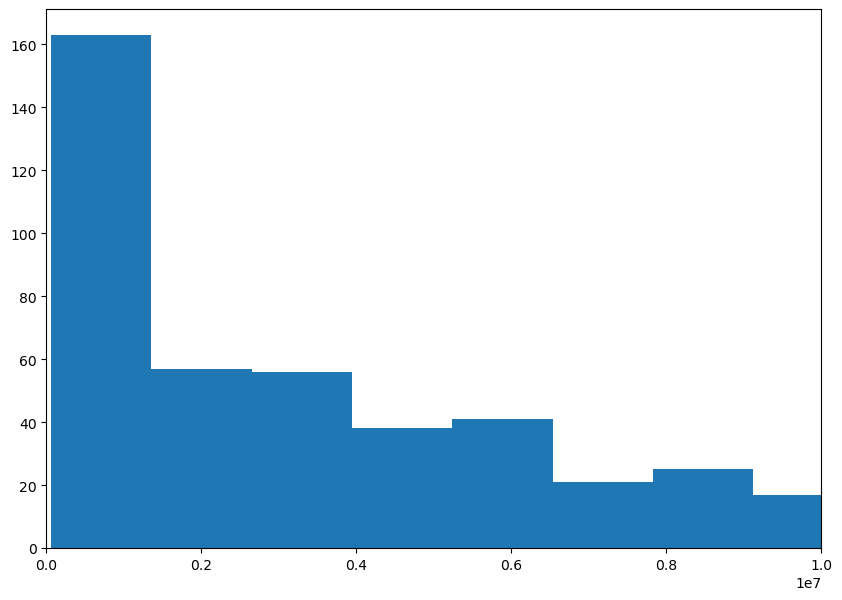

In [30]:
plt.figure(figsize=(10,7))
plt.hist(df.loc[df["league_name"]=="English Premier League","value_eur"],bins=100)
plt.xlim(0,10000000)
plt.show()

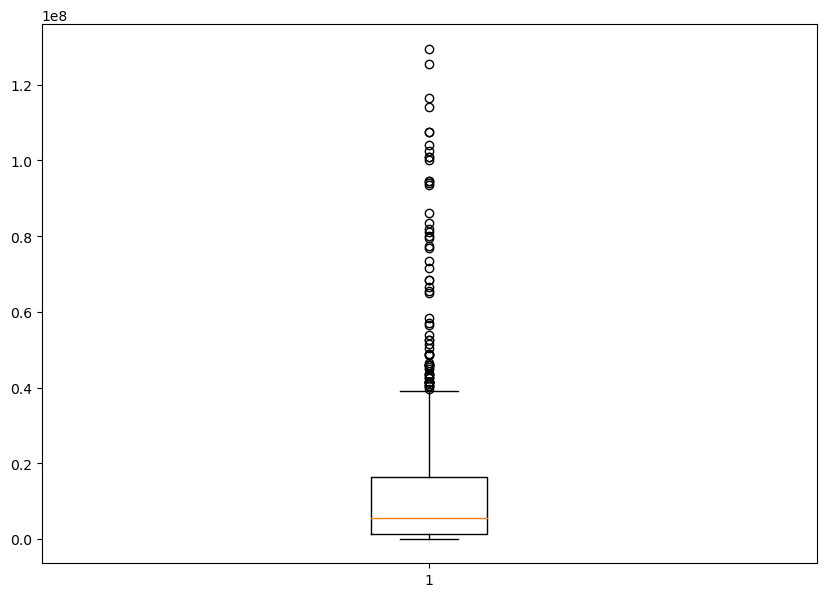

In [31]:
plt.figure(figsize=(10,7))
plt.boxplot(df.loc[df["league_name"]=="English Premier League","value_eur"])
plt.show()

In [32]:
df.groupby("league_name").agg({
    "value_eur":["mean","median","count","std"]}).sort_values(by=("value_eur","mean"), ascending=False)

value_eur                   \
                                              mean     median count   
league_name                                                           
English Premier League                1.403218e+07  5500000.0   652   
Spain Primera Division                1.150427e+07  5000000.0   633   
Italian Serie A                       9.429298e+06  3900000.0   563   
German 1. Bundesliga                  8.644973e+06  3100000.0   551   
French Ligue 1                        7.347478e+06  2800000.0   577   
Ukrainian Premier League              5.689286e+06  3550000.0    56   
Russian Premier League                4.675061e+06  3100000.0    82   
Czech Republic Gambrinus Liga         4.284367e+06  3000000.0    79   
Portuguese Liga ZON SAGRES            3.990861e+06  1800000.0   505   
Campeonato Brasileiro Série A         3.872583e+06  2100000.0   360   
Greek Super League                    3.440357e+06  2400000.0   112   
Croatian Prva HNL                     3.062411e+06  1850000.0    56   
Holland Eredivisie                    2.957165e+06  1300000.0   492   
Mexican Liga MX                       2.286496e+06  1400000.0   488   
Turkish Süper Lig                     2.234068e+06  1500000.0   542   
Belgian Jupiler Pro League            2.134191e+06  1500000.0   488   
Hungarian Nemzeti Bajnokság I         1.989464e+06  1900000.0    28   
Argentina Primera División            1.975214e+06  1400000.0   724   
Spanish Segunda División              1.825000e+06  1400000.0   624   
English League Championship           1.759582e+06  1400000.0   717   
USA Major League Soccer               1.624702e+06   975000.0   771   
Swiss Super League                    1.546519e+06  1050000.0   270   
Italian Serie B                       1.453371e+06  1250000.0   132   
German 2. Bundesliga                  1.428324e+06  1200000.0   510   
Scottish Premiership                  1.262747e+06   750000.0   320   
Saudi Abdul L. Jameel League          1.249861e+06   425000.0   468   
UAE Arabian Gulf League               1.249286e+06   837500.0    28   
Austrian Football Bundesliga          1.233970e+06   837500.0   330   
South African Premier Division        1.203929e+06  1000000.0    56   
Cypriot First Division                1.102321e+06   862500.0    28   
Danish Superliga                      1.091588e+06   775000.0   318   
Paraguayan Primera División           1.070954e+06   700000.0   173   
Uruguayan Primera División            1.042481e+06   700000.0   131   
French Ligue 2                        1.025860e+06   875000.0   529   
Ecuadorian Serie A                    9.839181e+05   700000.0   171   
Colombian Liga Postobón               9.301047e+05   775000.0   191   
Chinese Super League                  9.042472e+05   240000.0   445   
Chilian Campeonato Nacional           9.036774e+05   750000.0   155   
Japanese J. League Division 1         8.973891e+05   725000.0   586   
Peruvian Primera División             8.222393e+05   725000.0   163   
Norwegian Eliteserien                 8.135287e+05   675000.0   401   
English League One                    7.933946e+05   725000.0   626   
Korean K League 1                     7.772173e+05   500000.0   336   
Polish T-Mobile Ekstraklasa           7.719758e+05   650000.0   496   
Swedish Allsvenskan                   7.047710e+05   525000.0   393   
Liga de Fútbol Profesional Boliviano  7.005882e+05   550000.0   187   
Romanian Liga I                       6.958258e+05   525000.0   442   
German 3. Bundesliga                  6.672417e+05   575000.0   542   
Finnish Veikkausliiga                 6.458000e+05   525000.0    25   
Australian Hyundai A-League           6.269675e+05   450000.0   277   
Venezuelan Primera División           6.030745e+05   500000.0   161   
English League Two                    4.722504e+05   450000.0   611   
English National League               4.077778e+05   350000.0    27   
Rep. Ireland Airtricity League        3.115698e+05   235000.0   2

In [33]:
#df.loc[df["league_name"].isin()]

In [34]:
df_dropped.shape

(19165, 106)

In [35]:
for i in df.columns:
    print(i)

sofifa_id
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_c

In [36]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                       0
club_name                          0
league_name                        0
league_level                       0
club_position                      0
club_jersey_number                 0
club_loaned_from               18063
club_joined                     1102
club_contract_valid_until          0
nationality_id                     0
nationality_name                   0
nation_team_id                 18467
nation_position                18467
nation_jersey_number           18467
preferred_foot                     0
w

In [37]:
drop_cols = []

In [38]:
drop_cols

[]

In [39]:
df.drop(drop_cols,axis=1,inplace=True)

In [40]:
df.shape

(19165, 106)

In [41]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,RW,1
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,ST,0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,ST,1
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,LW,1
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium

In [42]:
df.drop("dob",axis=1,inplace=True)

In [43]:
df.shape

(19165, 105)

In [44]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
club_team_id                       0
club_name                          0
league_name                        0
league_level                       0
club_position                      0
club_jersey_number                 0
club_loaned_from               18063
club_joined                     1102
club_contract_valid_until          0
nationality_id                     0
nationality_name                   0
nation_team_id                 18467
nation_position                18467
nation_jersey_number           18467
preferred_foot                     0
weak_foot                          0
s

In [45]:
drop_cols=["nation_team_id","nation_position","nation_jersey_number"]

In [46]:
df.drop(drop_cols,axis=1,inplace=True)

# Kaleci Olanlar İçin Yeni Sütun

In [47]:
df.groupby("first_position").agg({"goalkeeping_speed":"mean"})

,goalkeeping_speed
first_position,
CAM,NaN
CB,NaN
CDM,NaN
CF,NaN
CM,NaN
GK,36.439266
LB,NaN
LM,NaN
LW,NaN


In [48]:
df['goalkeeping_speed'].fillna(0, inplace=True)

In [49]:
df.loc[df["goalkeeping_speed"] == 0, "goalkeeper"] = 0
df.loc[df["goalkeeping_speed"] > 0, "goalkeeper"] = 1

In [50]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position,goalkeeper
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,RW,1,0.0
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,ST,0,0.0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,ST,1,0.0
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,LW,1,0.0
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser,

In [51]:
df["gk"].value_counts()

gk
16+2    3840
15+2    3244
17+2    3162
14+2    2056
18+2    2000
13+2     900
19+2     864
20+2     272
12+2     238
61+2      89
59+2      84
62+2      80
63+2      78
18+3      76
60+2      74
57+2      73
65+2      71
64+2      69
66+2      63
19+3      62
56+2      62
55+2      62
17+3      61
58+2      60
11+2      60
54+2      58
21+2      58
53+2      54
67+2      52
51+2      48
69+2      48
65+1      45
68+1      41
67+1      40
68+2      39
66+1      39
63+1      38
69+1      38
52+2      38
70+1      37
72+1      37
16+3      37
71+2      36
62+1      35
71+1      33
64+1      32
61+1      31
73+1      29
74+1      27
20+3      27
70+2      26
50+2      25
72+2      25
21+3      23
60+1      20
49+2      19
75+1      18
73+2      17
74+2      17
76+2      16
59+1      16
75+2      15
22+2      15
15+3      12
78+2      11
48+2      11
57+1      11
10+2      10
77+2       9
80+2       9
58+1       8
79+2       8
79+1       8
47+2       8
80+1       7
56+1       7
78+1     

In [52]:
df.groupby("gk").agg({"value_eur":"mean"})

,value_eur
gk,
10+2,9.455000e+05
11+2,8.652500e+05
11+3,9.062500e+06
12+2,7.335084e+05
12+3,1.383333e+07
13+2,7.520222e+05
13+3,6.583333e+07
14+2,9.569674e+05
14+3,9.300000e+07


# İki Ayağınıda İyi Derecede Kullanabiliyor mu

In [53]:
df.loc[df["weak_foot"]>=4,"Both_Foot"] = 1
df.loc[df["weak_foot"]<=3,"Both_Foot"] = 0

In [54]:
df.groupby("Both_Foot").agg({"value_eur":"mean"})

,value_eur
Both_Foot,
0.0,2.321031e+06
1.0,5.599333e+06


In [55]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position,goalkeeper,Both_Foot
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,RW,1,0.0,1.0
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,ST,0,0.0,1.0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,ST,1,0.0,1.0
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,LW,1,0.0,1.0
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, 

In [56]:
df["player_tags"].unique()

array(['#Dribbler, #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Aerial Threat, #Distance Shooter, #Clinical Finisher, #Complete Forward',
       '#Aerial Threat, #Dribbler, #Distance Shooter, #Crosser, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Speedster, #Dribbler, #Playmaker, #FK Specialist, #Acrobat, #Complete Midfielder',
       '#Dribbler, #Playmaker, #Engine, #Distance Shooter, #Crosser, #Complete Midfielder',
       nan,
       '#Speedster, #Dribbler, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Distance Shooter, #Clinical Finisher',
       '#Tackling, #Tactician\xa0', '#Poacher',
       '#Dribbler, #Engine, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Engine, #Tackling, #Tactician, #Strength, #Complete Defender',
       '#Tackling, #Tactician, #Strength, #Complete Defender', '#Crosser',
       '#Aerial Threat, #Tackling, #Tactician, #Complete Defender',
       '#Playm

In [57]:
df.drop(["player_tags","player_traits"],axis=1,inplace=True)

In [58]:
df.shape

(19165, 102)

In [59]:
fix_cols = []

In [60]:
for col in df.columns:
    if len(col)==2 or len(col)==3:
        if col in ["age","dob"]:
            pass
        else:
            fix_cols.append(col)
    

In [61]:
fix_cols

['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

# + ve - bulunun sütunları topladım veya çıkardım

In [62]:
def fixer(x):
    if "+" in x:
        values = x.split("+")
        return int(values[0]) + int(values[1])
    elif "-" in x:
        values = x.split("-")
        return int(values[0]) - int(values[1])
    else:
        return int(x)

In [63]:
for col in fix_cols:
    df[col] = df[col].apply(lambda x: x if type(x)== int else fixer(x))

In [64]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position,goalkeeper,Both_Foot
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22,RW,1,0.0,1.0
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,92,92,92,85,88,88,88,85,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22,ST,0,0.0,1.0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,91,91,91,88,89,89,89,88,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23,ST,1,0.0,1.0
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,86,86,86,90,88,88,88,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23,LW,1,0.0,1.0
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,86,86,86,88,87,87,87,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,CM,1,0.0,1.0


In [65]:
df[fix_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ls      19165 non-null  int64
 1   st      19165 non-null  int64
 2   rs      19165 non-null  int64
 3   lw      19165 non-null  int64
 4   lf      19165 non-null  int64
 5   cf      19165 non-null  int64
 6   rf      19165 non-null  int64
 7   rw      19165 non-null  int64
 8   lam     19165 non-null  int64
 9   cam     19165 non-null  int64
 10  ram     19165 non-null  int64
 11  lm      19165 non-null  int64
 12  lcm     19165 non-null  int64
 13  cm      19165 non-null  int64
 14  rcm     19165 non-null  int64
 15  rm      19165 non-null  int64
 16  lwb     19165 non-null  int64
 17  ldm     19165 non-null  int64
 18  cdm     19165 non-null  int64
 19  rdm     19165 non-null  int64
 20  rwb     19165 non-null  int64
 21  lb      19165 non-null  int64
 22  lcb     19165 non-null  int64
 23  cb      19165 no

# Korelasyonları Yakın Olanları Grupladık

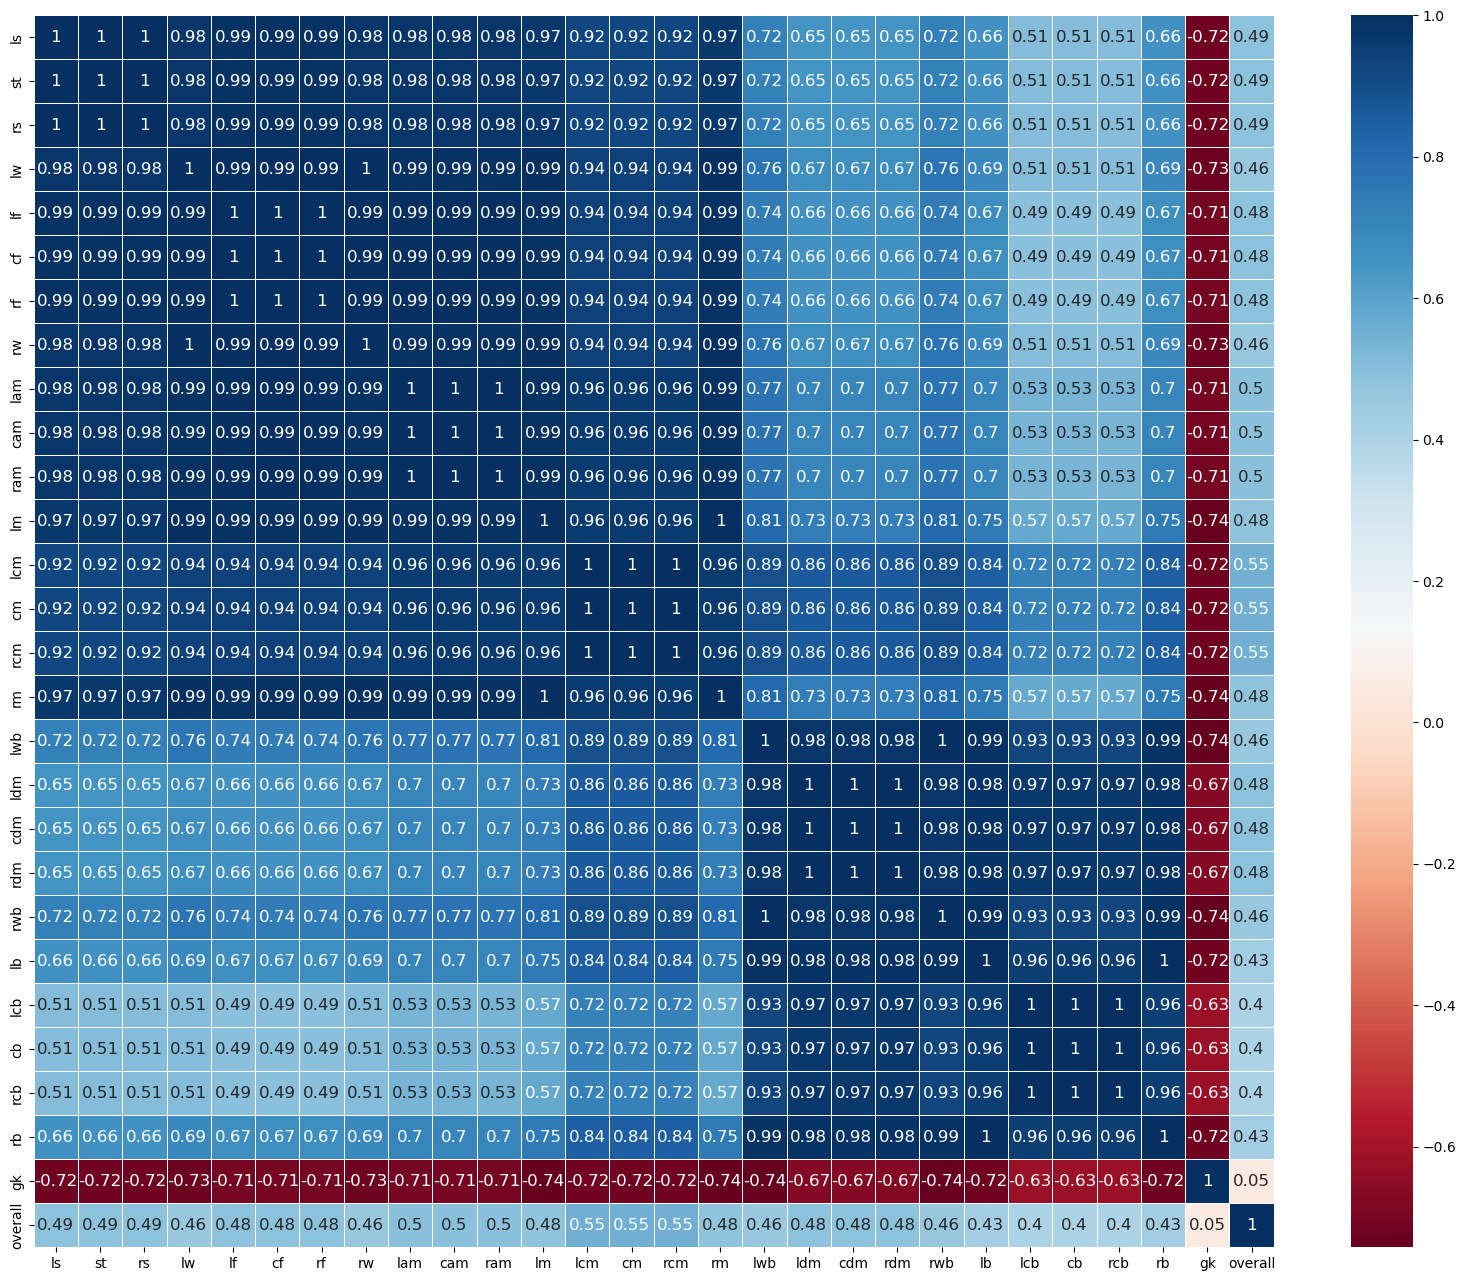

In [66]:
correlation_matrix(df,fix_cols + ["overall"])

In [67]:
mean_score_attack_cols = fix_cols[0:12]

In [68]:
df["mean_score_attack"] = df[mean_score_attack_cols].mean(axis=1)

In [69]:
len(fix_cols)

27

In [70]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,92,92,92,92,93,93,93,92,93,93,93,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22,RW,1,0.0,1.0,92.583333
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,92,92,92,85,88,88,88,85,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22,ST,0,0.0,1.0,88.666667
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,91,91,91,88,89,89,89,88,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23,ST,1,0.0,1.0,89.333333
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,86,86,86,90,88,88,88,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23,LW,1,0.0,1.0,88.833333
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,86,86,86,88,87,87,87,88,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,CM,1,0.0,1.0,88.250000


In [71]:
mean_score_midfielder = fix_cols[12:16]

In [72]:
df["mean_score_midfielder"] = df[mean_score_midfielder].mean(axis=1)

In [73]:
mean_score_defender = fix_cols[16:26]

In [74]:
df["mean_score_defender"] = df[mean_score_defender].mean(axis=1)

In [75]:
df["mean_score_goalkeeper"] = df["gk"]

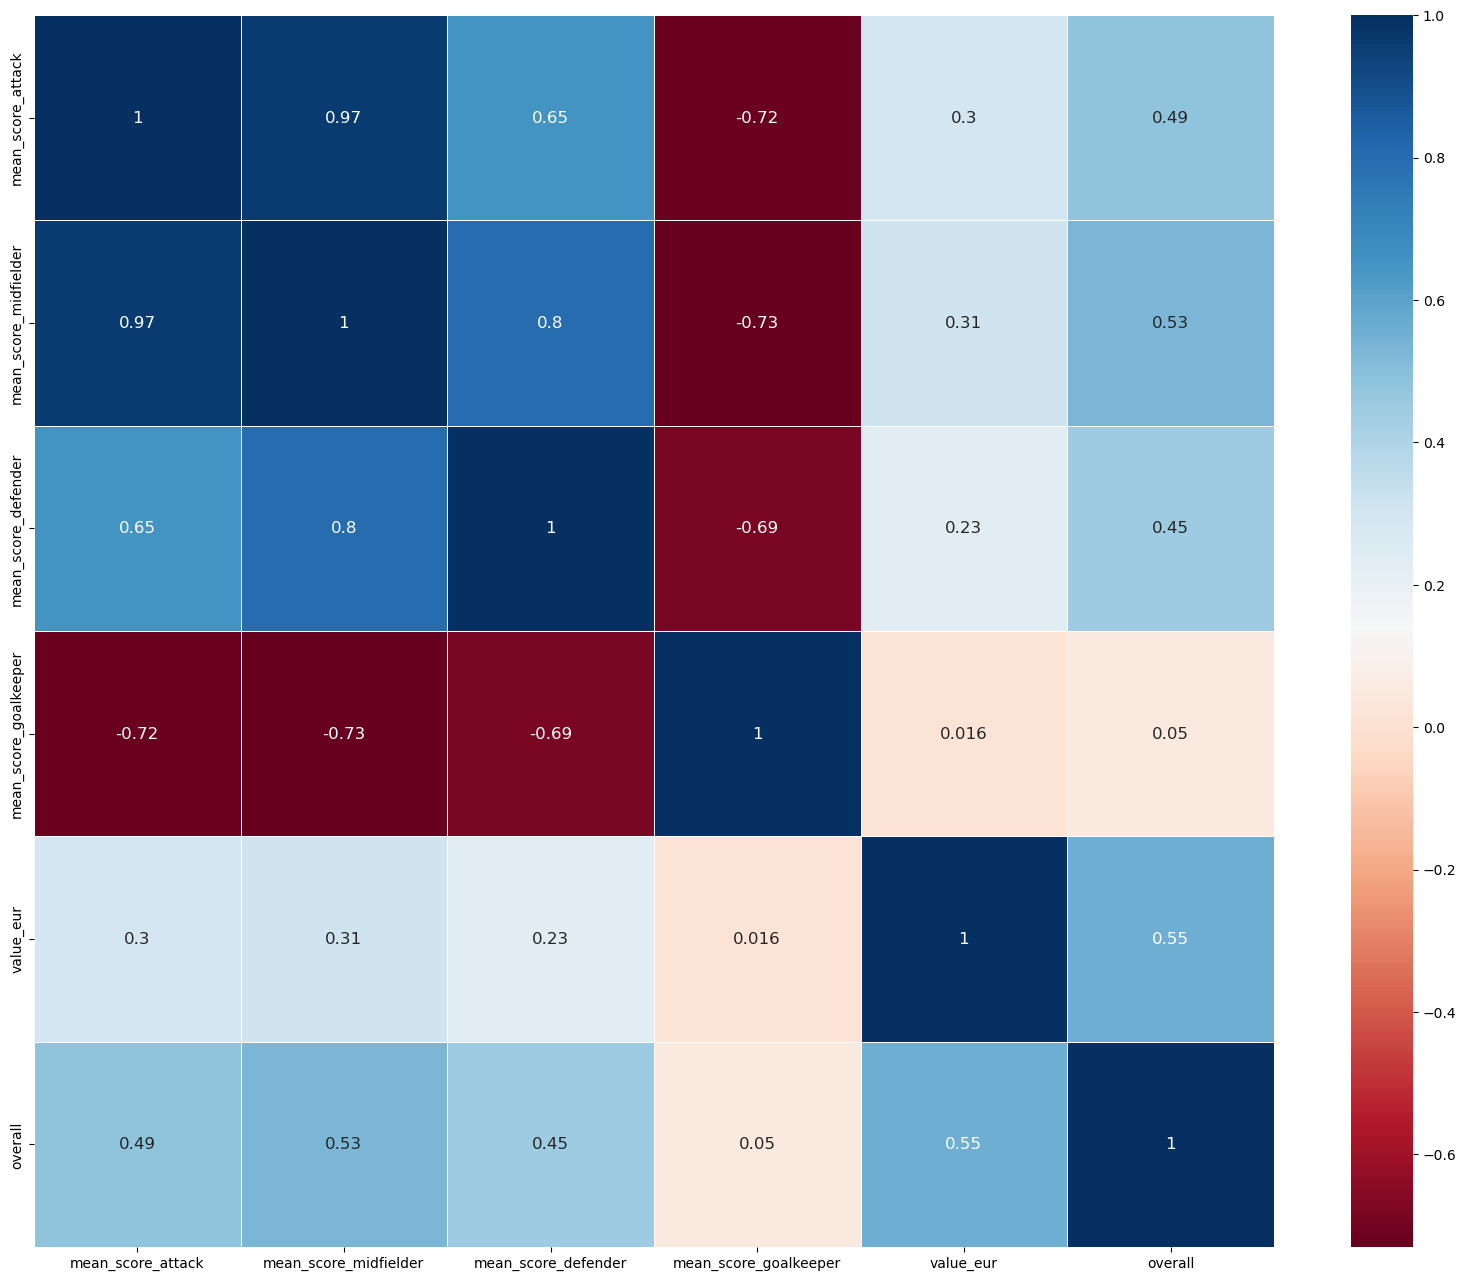

In [76]:
correlation_matrix(df,["mean_score_attack","mean_score_midfielder","mean_score_defender","mean_score_goalkeeper","value_eur","overall"])

In [77]:
df.drop(fix_cols,inplace=True,axis=1)

In [78]:
df.shape

(19165, 79)

In [79]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24


In [80]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
club_team_id                       0
club_name                          0
league_name                        0
league_level                       0
club_position                      0
club_jersey_number                 0
club_loaned_from               18063
club_joined                     1102
club_contract_valid_until          0
nationality_id                     0
nationality_name                   0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
b

# Kiralanan Futbolcuların Target ile Analizi ve Testini Yaptım Fakat Herhangi Bir Alaka Çıkmadı

In [81]:
df.loc[df["club_loaned_from"].isna(),"loaned"] = 0
df.loc[df["club_loaned_from"].isna()==False,"loaned"] = 1

In [82]:
df["loaned"].value_counts()

loaned
0.0    18063
1.0     1102
Name: count, dtype: int64

In [83]:
df.groupby("loaned").agg({"value_eur":"mean"})

,value_eur
loaned,
0.0,2.840796e+06
1.0,3.008716e+06


In [84]:
pg.ttest(df.loc[df["loaned"]==0,"value_eur"],df.loc[df["loaned"]==1,"value_eur"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.994084,1407.569681,two-sided,0.320353,"[-499279.53, 163440.24]",0.022055,0.057,0.109576


In [85]:
pvalue_list = []
cohen_list = []
for i in range(100):
    result = pg.ttest(df.loc[df["loaned"]==0,"value_eur"].sample(30),df.loc[df["loaned"]==1,"value_eur"].sample(30))
    pvalue_list.append(result["p-val"].values[0])
    cohen_list.append(result["cohen-d"].values[0])

print("mean_p_value",np.mean(pvalue_list))
print("mean_cohen",np.mean(cohen_list))
    

mean_p_value 0.4732140713456828
mean_cohen 0.2272579684785957


In [86]:
df.drop(["loaned","club_loaned_from"],axis=1,inplace=True)

In [87]:
df.shape

(19165, 78)

In [88]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24


In [89]:
df.isnull().sum()

sofifa_id                         0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_joined                    1102
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
real_face                   

In [90]:
df.drop("club_joined",axis=1,inplace=True)

In [91]:
df.groupby("first_position").agg({"pace":"mean"})

,pace
first_position,
CAM,70.125000
CB,59.129479
CDM,61.543426
CF,76.084507
CM,65.658829
GK,NaN
LB,72.543446
LM,76.609684
LW,77.725581


In [92]:
gk_0_columns = ["physic","defending","dribbling","passing","shooting","pace"]

In [93]:
df[gk_0_columns].fillna(0,inplace=True)

C:\Users\halim\AppData\Local\Temp\ipykernel_8152\182946329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[gk_0_columns].fillna(0,inplace=True)


In [94]:
df.isnull().sum()

sofifa_id                         0
short_name                        0
long_name                         0
player_positions                  0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
club_name                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur          

In [95]:
for col in gk_0_columns:
    df[col].fillna(0,inplace=True)

In [96]:
df[df["release_clause_eur"].isnull()].head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper
83,194765,A. Griezmann,Antoine Griezmann,"ST, LW, RW",85,85,53000000.0,220000.0,30,176,73,240.0,Atlético de Madrid,Spain Primera Division,1.0,LS,17.0,2022.0,18,France,Left,3,4,4,Medium/Medium,Unique,Yes,NaN,80.0,84.0,84.0,87.0,52.0,72.0,83,84,83,84,86,85,86,85,82,89,80,80,92,89,83,82,90,86,63,83,73,49,89,85,79,90,43,54,49,14,8,14,13,14,0.0,ST,1,0.0,0.0,85.000000,85.00,70.6,24
163,201153,Morata,Álvaro Borja Morata Martín,ST,83,83,37000000.0,84000.0,28,190,84,45.0,Juventus,Italian Serie A,1.0,ST,9.0,2022.0,45,Spain,Right,4,3,3,Medium/Medium,Unique,Yes,NaN,82.0,80.0,72.0,81.0,31.0,77.0,72,84,86,78,80,83,78,44,60,83,79,85,72,80,63,80,84,77,80,72,69,24,87,77,75,79,37,14,20,4,5,4,4,5,0.0,ST,0,0.0,1.0,82.333333,76.00,56.9,16
195,235805,F. Chiesa,Federico Chiesa,"RW, LW, RM",83,91,80500000.0,74000.0,23,175,70,45.0,Juventus,Italian Serie A,1.0,LM,22.0,2022.0,27,Italy,Right,4,4,3,High/Medium,Normal (170-185),Yes,NaN,91.0,81.0,74.0,85.0,48.0,73.0,73,79,50,78,80,89,78,52,72,82,91,91,87,83,81,86,53,85,71,84,69,30,81,75,62,78,65,44,44,6,7,8,9,7,0.0,RW,1,0.0,1.0,83.166667,79.75,65.5,19
207,180206,M. Pjanić,Miralem Pjanić,CM,82,82,25000000.0,155000.0,31,178,72,327.0,Beşiktaş JK,Turkish Süper Lig,1.0,RCM,15.0,2022.0,8,Bosnia and Herzegovina,Right,4,3,3,Medium/Medium,Normal (170-185),Yes,NaN,65.0,68.0,83.0,81.0,75.0,67.0,80,56,60,84,72,81,86,92,82,83,67,64,74,83,80,78,59,79,60,80,70,78,68,84,79,84,78,77,71,7,7,13,7,8,0.0,CM,0,0.0,1.0,76.583333,81.50,79.4,19
216,193105,A. Areola,Alphonse Areola,GK,82,84,26000000.0,75000.0,28,195,94,19.0,West Ham United,English Premier League,1.0,SUB,13.0,2022.0,18,France,Right,3,1,2,Medium/Medium,Unique,Yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,20,19,14,48,16,15,16,16,37,22,56,54,58,78,58,57,72,38,80,14,26,23,17,51,25,64,13,18,12,85,79,76,80,85,55.0,GK,0,1.0,0.0,35.583333,37.75,34.1,83


In [97]:
df.drop(["sofifa_id","short_name","club_team_id","club_name","player_positions","club_team_id","club_name"],inplace=True,axis=1)

In [98]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,French Ligue 1,1.0,RW,30.0,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,German 1. Bundesliga,1.0,ST,9.0,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,English Premier League,1.0,ST,7.0,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,French Ligue 1,1.0,LW,10.0,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,English Premier League,1.0,RCM,17.0,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24


In [99]:
df.shape

(19165, 72)

In [100]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64","float64"]) & (df[col].nunique() > 2)]

In [101]:
num_cols

['overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nationality_id',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   long_name                    19165 non-null  object 
 1   overall                      19165 non-null  int64  
 2   potential                    19165 non-null  int64  
 3   value_eur                    19165 non-null  float64
 4   wage_eur                     19165 non-null  float64
 5   age                          19165 non-null  int64  
 6   height_cm                    19165 non-null  int64  
 7   weight_kg                    19165 non-null  int64  
 8   league_name                  19165 non-null  object 
 9   league_level                 19165 non-null  float64
 10  club_position                19165 non-null  object 
 11  club_jersey_number           19165 non-null  float64
 12  club_contract_valid_until    19165 non-null  float64
 13  nationality_id       

In [103]:
df.loc[df["real_face"]=="Yes","Face"] = 1
df.loc[df["real_face"]=="No","Face"] = 0

In [104]:
df[df["first_position"]==df["club_position"]].shape

(3297, 73)

# Yaş'tan Kategorik Değişken Oluşturma

In [105]:
df["new_age_cat"] = pd.cut(x=df["age"],
                            bins=[14,21,25,30,35,100],
                            labels=["Wonderkid","Young Talent","Mature Players","Exp.Players","Veteran"])

In [106]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,French Ligue 1,1.0,RW,30.0,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,German 1. Bundesliga,1.0,ST,9.0,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,English Premier League,1.0,ST,7.0,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,French Ligue 1,1.0,LW,10.0,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,English Premier League,1.0,RCM,17.0,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players


In [107]:
df.isnull().sum()

long_name                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
league_name                       0
league_level                      0
club_position                     0
club_jersey_number                0
club_contract_valid_until         0
nationality_id                    0
nationality_name                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1102
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                   

# release_clause_eur değerlerine göre gruplandırma

In [108]:
df["release_clause_eur"].fillna(0, inplace=True)

In [109]:
df["release_clause_eur"].describe([0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.87,0.90,0.99])

count    1.916500e+04
mean     5.065033e+06
std      1.456604e+07
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      2.750000e+05
25%      6.980000e+05
30%      8.280000e+05
40%      1.100000e+06
50%      1.500000e+06
60%      2.000000e+06
75%      3.500000e+06
85%      5.900000e+06
87%      6.700000e+06
90%      9.100000e+06
99%      6.947200e+07
max      3.735000e+08
Name: release_clause_eur, dtype: float64

In [110]:
df["release_clause_eur_cat"] = pd.cut(x=df["release_clause_eur"],bins=[-1,
                                                        df.release_clause_eur.quantile(0.10),
                                                        df.release_clause_eur.quantile(0.50),
                                                        df.release_clause_eur.quantile(0.87),
                                                        df.release_clause_eur.quantile(1)],
            labels=["Very_Low_Release_Eur","Low_Release_Eur", "Average_Release_Eur", "High_Release_Eur"])

In [111]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,French Ligue 1,1.0,RW,30.0,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,German 1. Bundesliga,1.0,ST,9.0,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,English Premier League,1.0,ST,7.0,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,French Ligue 1,1.0,LW,10.0,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,English Premier League,1.0,RCM,17.0,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur


In [112]:
df["release_clause_eur_cat"].value_counts()

release_clause_eur_cat
Low_Release_Eur         7855
Average_Release_Eur     6907
High_Release_Eur        2485
Very_Low_Release_Eur    1918
Name: count, dtype: int64

In [113]:
df.drop("release_clause_eur",inplace=True,axis=1)

# Liglerin Gruplandırılması

In [114]:
df.groupby("league_name").agg({"value_eur":["mean","median","count","std"]}).sort_values(by=("value_eur","mean"), ascending=False)

value_eur                   \
                                              mean     median count   
league_name                                                           
English Premier League                1.403218e+07  5500000.0   652   
Spain Primera Division                1.150427e+07  5000000.0   633   
Italian Serie A                       9.429298e+06  3900000.0   563   
German 1. Bundesliga                  8.644973e+06  3100000.0   551   
French Ligue 1                        7.347478e+06  2800000.0   577   
Ukrainian Premier League              5.689286e+06  3550000.0    56   
Russian Premier League                4.675061e+06  3100000.0    82   
Czech Republic Gambrinus Liga         4.284367e+06  3000000.0    79   
Portuguese Liga ZON SAGRES            3.990861e+06  1800000.0   505   
Campeonato Brasileiro Série A         3.872583e+06  2100000.0   360   
Greek Super League                    3.440357e+06  2400000.0   112   
Croatian Prva HNL                     3.062411e+06  1850000.0    56   
Holland Eredivisie                    2.957165e+06  1300000.0   492   
Mexican Liga MX                       2.286496e+06  1400000.0   488   
Turkish Süper Lig                     2.234068e+06  1500000.0   542   
Belgian Jupiler Pro League            2.134191e+06  1500000.0   488   
Hungarian Nemzeti Bajnokság I         1.989464e+06  1900000.0    28   
Argentina Primera División            1.975214e+06  1400000.0   724   
Spanish Segunda División              1.825000e+06  1400000.0   624   
English League Championship           1.759582e+06  1400000.0   717   
USA Major League Soccer               1.624702e+06   975000.0   771   
Swiss Super League                    1.546519e+06  1050000.0   270   
Italian Serie B                       1.453371e+06  1250000.0   132   
German 2. Bundesliga                  1.428324e+06  1200000.0   510   
Scottish Premiership                  1.262747e+06   750000.0   320   
Saudi Abdul L. Jameel League          1.249861e+06   425000.0   468   
UAE Arabian Gulf League               1.249286e+06   837500.0    28   
Austrian Football Bundesliga          1.233970e+06   837500.0   330   
South African Premier Division        1.203929e+06  1000000.0    56   
Cypriot First Division                1.102321e+06   862500.0    28   
Danish Superliga                      1.091588e+06   775000.0   318   
Paraguayan Primera División           1.070954e+06   700000.0   173   
Uruguayan Primera División            1.042481e+06   700000.0   131   
French Ligue 2                        1.025860e+06   875000.0   529   
Ecuadorian Serie A                    9.839181e+05   700000.0   171   
Colombian Liga Postobón               9.301047e+05   775000.0   191   
Chinese Super League                  9.042472e+05   240000.0   445   
Chilian Campeonato Nacional           9.036774e+05   750000.0   155   
Japanese J. League Division 1         8.973891e+05   725000.0   586   
Peruvian Primera División             8.222393e+05   725000.0   163   
Norwegian Eliteserien                 8.135287e+05   675000.0   401   
English League One                    7.933946e+05   725000.0   626   
Korean K League 1                     7.772173e+05   500000.0   336   
Polish T-Mobile Ekstraklasa           7.719758e+05   650000.0   496   
Swedish Allsvenskan                   7.047710e+05   525000.0   393   
Liga de Fútbol Profesional Boliviano  7.005882e+05   550000.0   187   
Romanian Liga I                       6.958258e+05   525000.0   442   
German 3. Bundesliga                  6.672417e+05   575000.0   542   
Finnish Veikkausliiga                 6.458000e+05   525000.0    25   
Australian Hyundai A-League           6.269675e+05   450000.0   277   
Venezuelan Primera División           6.030745e+05   500000.0   161   
English League Two                    4.722504e+05   450000.0   611   
English National League               4.077778e+05   350000.0    27   
Rep. Ireland Airtricity League        3.115698e+05   235000.0   2

In [115]:
top_7_league = ["English Premier League","Spain Primera Division",
                "Italian Serie A","German 1. Bundesliga",
                "French Ligue 1","Ukrainian Premier League","Russian Premier League"]

In [116]:
top_8_18_league = ["Czech Republic Gambrinus Liga","Portuguese Liga ZON SAGRES",
                   "Campeonato Brasileiro Série A","Greek Super League","Croatian Prva HNL",
                   "Holland Eredivisie","Mexican Liga MX","Turkish Süper Lig","Belgian Jupiler Pro League",
                   "Hungarian Nemzeti Bajnokság I","Argentina Primera División"]

In [117]:
def league_encoding(x):
    if x in top_7_league:
        return "top_7_league"
    elif x in top_8_18_league:
        return "top_8_18_league"
    else:
        return "above_18_league"


In [118]:
df["league_group"] = df["league_name"].apply(lambda x: league_encoding(x))

In [119]:
df["league_group"].value_counts()

league_group
above_18_league    12177
top_8_18_league     3874
top_7_league        3114
Name: count, dtype: int64

In [120]:
df.drop("league_name",axis=1,inplace=True)

In [121]:
df.shape

(19165, 74)

In [122]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,1.0,RW,30.0,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,1.0,ST,9.0,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,1.0,ST,7.0,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,1.0,LW,10.0,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,1.0,RCM,17.0,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur,top_7_league


In [123]:
df.groupby("nationality_name").agg({"value_eur":["mean","std"],
                                    "nationality_name":"count"}).sort_values(by=("value_eur","mean"), ascending=False)

value_eur               nationality_name
                                  mean           std            count
nationality_name                                                     
Egypt                     1.201875e+07  2.817002e+07               12
Central African Republic  9.187500e+06  1.175565e+07                2
Italy                     6.320962e+06  1.300292e+07              338
Algeria                   6.217549e+06  1.079835e+07               51
Portugal                  6.086689e+06  1.282003e+07              373
Gabon                     5.975000e+06  1.208642e+07               12
Libya                     5.933333e+06  6.562266e+06                3
Armenia                   5.560714e+06  1.065272e+07                7
Spain                     5.303756e+06  9.951359e+06             1085
Burkina Faso              5.296875e+06  1.189669e+07               16
Slovenia                  5.109615e+06  1.591461e+07               52
Brazil                    5.102982e+06  1.041959e+07              897
Mozambique                5.100000e+06  6.631742e+06                4
Ukraine                   4.872239e+06  6.642501e+06               67
Morocco                   4.820693e+06  9.724855e+06              101
France                    4.698388e+06  1.153389e+07              980
Croatia                   4.614708e+06  7.890352e+06              154
Zambia                    4.577778e+06  6.940725e+06                9
Serbia                    4.566626e+06  8.908448e+06              123
Togo                      4.502273e+06  7.193074e+06               11
Czech Republic            4.403186e+06  5.730821e+06              102
Senegal                   4.370354e+06  1.098627e+07              127
Netherlands               4.335592e+06  1.036076e+07              439
Tanzania                  4.300000e+06           NaN                1
Belgium                   4.270578e+06  1.186282e+07              320
Montenegro                4.231522e+06  7.517552e+06               23
Côte d'Ivoire             3.940811e+06  7.199969e+06              111
Slovakia                  3.883250e+06  9.738159e+06               60
Nigeria                   3.869600e+06  7.791858e+06              125
Syria                     3.700000e+06  3.252691e+06                2
Russia                    3.599012e+06  4.908176e+06               81
Cape Verde Islands        3.561429e+06  6.733616e+06               21
Israel                    3.477273e+06  5.011575e+06               22
Hungary                   3.404250e+06  6.734551e+06               40
Mali                      3.381579e+06  4.680134e+06               57
Cameroon                  3.318692e+06  4.751787e+06               65
Uruguay                   3.293286e+06  7.121941e+06              280
Argentina                 3.272055e+06  7.042172e+06              956
Greece                    3.105412e+06  4.470729e+06               97
Congo DR                  3.043396e+06  4.477694e+06               53
Liberia                   3.010000e+06  4.505608e+06                5
Switzerland               2.996146e+06  5.184863e+06              192
Jamaica                   2.963194e+06  7.096509e+06               36
Guinea                    2.928182e+06  5.467353e+06               33
Germany                   2.810515e+06  8.466151e+06             1214
Zimbabwe                  2.776154e+06  3.757101e+06               13
Albania                   2.734891e+06  4.344866e+06               46
Namibia                   2.666667e+06  2.173323e+06                3
Colombia                  2.642112e+06  4.693474e+06              322
Bosnia and Herzegovina    2.560282e+06  4.224110e+06               71
North Macedonia           2.559643e+06  4.100276e+06               28
England                   2.525693e+06  8.329023e+06             1717
Angola                    2.522059e+06  2.912217e+06               17
Iran                      2.513571e+06  3.746971e+06               21
Ghana                     2.407148e+06 

In [124]:
df.drop(["club_contract_valid_until","nationality_id","nationality_name"],axis=1,inplace=True)

In [125]:
df.shape

(19165, 71)

# Work Rate leri Grupladım

In [126]:
df["work_rate"].value_counts()

work_rate
Medium/Medium    9991
High/Medium      3651
Medium/High      1867
High/High        1092
High/Low          806
Medium/Low        800
Low/Medium        462
Low/High          453
Low/Low            43
Name: count, dtype: int64

In [127]:
df.groupby("work_rate").agg({"value_eur":"mean",
                             "work_rate":"count"}).sort_values(by="value_eur",ascending=False)

,value_eur,work_rate
work_rate,,
High/High,6.101300e+06,1092
High/Medium,4.112199e+06,3651
High/Low,3.454032e+06,806
Medium/High,3.393337e+06,1867
Low/High,2.375265e+06,453
Medium/Low,2.368656e+06,800
Low/Low,2.027442e+06,43
Medium/Medium,2.004213e+06,9991
Low/Medium,1.625866e+06,462


In [128]:
df.loc[(df["work_rate"] == "High/High") | (df["work_rate"] == "High/Medium"), "work_rate_cat"] = "High_Work_Rate"
df.loc[(df["work_rate"] == "High/Low") | (df["work_rate"] == "Medium/High"), "work_rate_cat"] = "Medium_Work_Rate"

In [129]:
df.isnull().sum()

long_name                          0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
league_level                       0
club_position                      0
club_jersey_number                 0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
body_type                          0
real_face                          0
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
a

In [130]:
df["work_rate_cat"].fillna("Low_Work_Rate",inplace=True)

In [131]:
df["work_rate_cat"].value_counts()

work_rate_cat
Low_Work_Rate       11749
High_Work_Rate       4743
Medium_Work_Rate     2673
Name: count, dtype: int64

In [132]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_position,club_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,1.0,RW,30.0,Left,4,4,5,Medium/Low,Unique,Yes,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,1.0,ST,9.0,Right,4,4,5,High/Medium,Unique,Yes,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,1.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,1.0,LW,10.0,Right,5,5,5,High/Medium,Unique,Yes,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,1.0,RCM,17.0,Right,5,4,4,High/High,Unique,Yes,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate


In [133]:
df.groupby("work_rate_cat").agg({"value_eur":"mean"})

,value_eur
work_rate_cat,
High_Work_Rate,4.570158e+06
Low_Work_Rate,2.028542e+06
Medium_Work_Rate,3.411639e+06


In [134]:
df.drop("work_rate",axis=1,inplace=True)

In [135]:
df["height_cm"].describe([0.01,0.05,0.10,0.15,0.20,0.30,0.45,0.50,0.60,0.65,0.75,0.85,0.90,0.95])

count    19165.000000
mean       181.290008
std          6.862654
min        155.000000
1%         166.000000
5%         170.000000
10%        172.000000
15%        174.000000
20%        175.000000
30%        178.000000
45%        180.000000
50%        181.000000
60%        183.000000
65%        184.000000
75%        186.000000
85%        188.000000
90%        190.000000
95%        193.000000
max        206.000000
Name: height_cm, dtype: float64

In [136]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_position,club_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,1.0,RW,30.0,Left,4,4,5,Unique,Yes,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,1.0,ST,9.0,Right,4,4,5,Unique,Yes,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,1.0,ST,7.0,Right,4,5,5,Unique,Yes,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,1.0,LW,10.0,Right,5,5,5,Unique,Yes,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate
4,Kevin De Bruyne,91,91,125500000.0,350000.0,30,181,70,1.0,RCM,17.0,Right,5,4,4,Unique,Yes,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate


In [137]:
df["body_type"].value_counts()

body_type
Normal (170-185)    6664
Normal (185+)       4211
Lean (170-185)      4071
Lean (185+)         1929
Normal (170-)        668
Stocky (170-185)     559
Lean (170-)          477
Stocky (185+)        353
Unique               136
Stocky (170-)         97
Name: count, dtype: int64

In [138]:
df.groupby("body_type").agg({"value_eur":"mean"})

,value_eur
body_type,
Lean (170-),1.710157e+06
Lean (170-185),2.610178e+06
Lean (185+),2.547061e+06
Normal (170-),2.507912e+06
Normal (170-185),2.391024e+06
Normal (185+),2.473829e+06
Stocky (170-),2.966340e+06
Stocky (170-185),3.034016e+06
Stocky (185+),2.988510e+06


In [139]:
df["international_reputation"].value_counts()

international_reputation
1    17786
2     1033
3      281
4       57
5        8
Name: count, dtype: int64

In [140]:
df.loc[df["international_reputation"]==5]

,long_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_position,club_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,170,72,1.0,RW,30.0,Left,4,4,5,Unique,Yes,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
1,Robert Lewandowski,92,92,119500000.0,270000.0,32,185,81,1.0,ST,9.0,Right,4,4,5,Unique,Yes,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,187,83,1.0,ST,7.0,Right,4,5,5,Unique,Yes,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,175,68,1.0,LW,10.0,Right,5,5,5,Unique,Yes,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate
5,Jan Oblak,91,93,112000000.0,130000.0,28,188,87,1.0,GK,13.0,Right,3,1,5,Unique,Yes,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0,GK,0,1.0,0.0,36.500000,40.25,36.5,92,1.0,Mature Players,High_Release_Eur,top_7_league,Low_Work_Rate
7,Manuel Peter Neuer,90,90,13500000.0,86000.0,35,193,93,1.0,GK,1.0,Right,4,1,5,Unique,Yes,0.0,0.0,0.0,0.0,0.0,0.0,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0,GK,0,1.0,1.0,44.583333,51.50,40.5,90,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
23,Luis Alberto Suárez Díaz,88,88,44500000.0,135000.0,34,182,83,1.0,RS,9.0,Right,4,3,5,Unique,Yes,72.0,90.0,82.0,84.0,47.0,83.0,80,93,84,83,90,83,86,82,77,86,76,69,75,92,78,89,69,78,85,88,87,41,91,84,83,87,42,45,38,27,25,31,33,37,0.0,ST,0,0.0,1.0,86.666667,83.75,67.2,40,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
97,Zlatan Ibrahimović,84,84,14500000.0,51000.0,39,195,95,1.0,SUB,11.0,Right,4,5,5,Unique,Yes,65.0,87.0,78.0,79.0,34.0,77.0,72,86,83,80,88,78,80,75,73,86,64,66,71,83,53,88,79,52,87,88,84,20,89,84,83,90,28,37,24,13,15,10,9,12,0.0,ST,0,0.0,1.0,82.583333,78.75,57.7,23,1.0,Veteran,High_Release_Eur,top_7_league,Low_Work_Rate


In [141]:
drop_list = ["age","height_cm","weight_kg","club_position","club_jersey_number","real_face"]

In [142]:
df.drop(drop_list,axis=1,inplace=True)

In [143]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,league_level,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,first_position,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,1.0,Left,4,4,5,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,RW,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
1,Robert Lewandowski,92,92,119500000.0,270000.0,1.0,Right,4,4,5,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,ST,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,1.0,Right,4,5,5,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,ST,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,1.0,Right,5,5,5,Unique,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,LW,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate
4,Kevin De Bruyne,91,91,125500000.0,350000.0,1.0,Right,5,4,4,Unique,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,CM,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate


In [144]:
df.loc[df["preferred_foot"]=="Left","foot_right"] = 0

In [145]:
df["foot_right"].fillna(1,inplace=True)

In [146]:
df.isnull().sum().sum()

0

In [147]:
df.isnull().sum()

long_name                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
league_level                   0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
body_type                      0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_r

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   long_name                    19165 non-null  object  
 1   overall                      19165 non-null  int64   
 2   potential                    19165 non-null  int64   
 3   value_eur                    19165 non-null  float64 
 4   wage_eur                     19165 non-null  float64 
 5   league_level                 19165 non-null  float64 
 6   preferred_foot               19165 non-null  object  
 7   weak_foot                    19165 non-null  int64   
 8   skill_moves                  19165 non-null  int64   
 9   international_reputation     19165 non-null  int64   
 10  body_type                    19165 non-null  object  
 11  pace                         19165 non-null  float64 
 12  shooting                     19165 non-null  float64 
 13  passin

In [149]:
str_list = [col for col in df.columns if df[col].dtype in ["object","category"]]

In [150]:
df[str_list].head()

,long_name,preferred_foot,body_type,first_position,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat
0,Lionel Andrés Messi Cuccittini,Left,Unique,RW,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate
1,Robert Lewandowski,Right,Unique,ST,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate
2,Cristiano Ronaldo dos Santos Aveiro,Right,Unique,ST,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate
3,Neymar da Silva Santos Júnior,Right,Unique,LW,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate
4,Kevin De Bruyne,Right,Unique,CM,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate


In [151]:
df[str_list].nunique()

long_name                 19145
preferred_foot                2
body_type                    10
first_position               15
new_age_cat                   5
release_clause_eur_cat        4
league_group                  3
work_rate_cat                 3
dtype: int64

In [152]:
df.groupby("first_position").agg({"value_eur":"mean"}).sort_values(by="value_eur",ascending=False)

,value_eur
first_position,
CF,6.785599e+06
LW,4.304442e+06
RW,4.207545e+06
CAM,3.573435e+06
CM,3.244223e+06
LWB,3.107924e+06
ST,2.984552e+06
LM,2.979427e+06
RWB,2.941657e+06


In [153]:
result = pairwise_tukeyhsd(df["value_eur"], df["first_position"])
print(result)

C:\Users\halim\AppData\Local\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
   CAM     CB -1039120.3493 0.0058 -1921679.8212  -156560.8774   True
   CAM    CDM  -685485.9781 0.5529 -1674971.6022   303999.6459  False
   CAM     CF  3212163.2769 0.0002    921591.008  5502735.5458   True
   CAM     CM  -329212.1704 0.9976 -1269906.7215   611482.3807  False
   CAM     GK -1642670.7196    0.0 -2586799.9729  -698541.4663   True
   CAM     LB -1103685.6829 0.0231 -2136831.1014   -70540.2643   True
   CAM     LM  -594008.4372 0.8932 -1704977.0989   516960.2244  False
   CAM     LW   731006.5458 0.9328  -725243.0663  2187256.1579  False
   CAM    LWB  -465511.3381    1.0 -2576240.4867  1645217.8106  False
   CAM     RB -1134806.7646 0.0168  -2171476.735   -98136.7942   True
   CAM     RM  -788396.3283 0.5029 -1895335.7976   318543.1409  False
   CAM     RW   6341

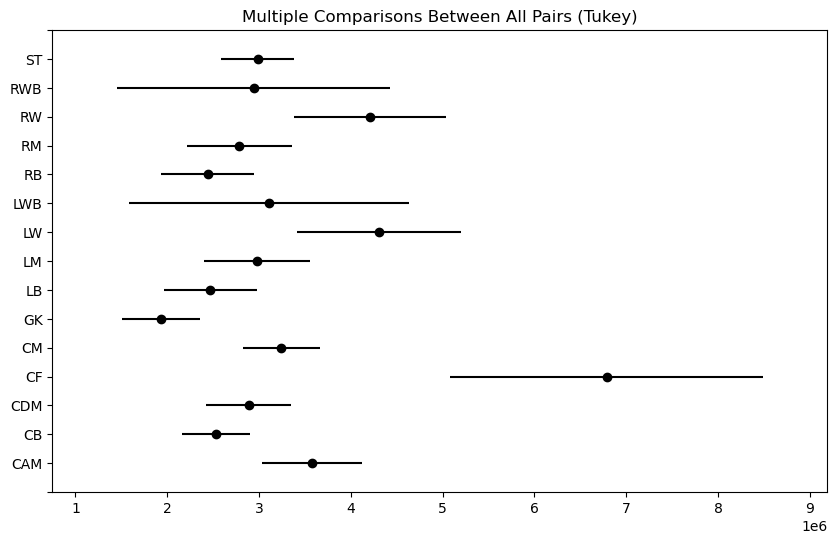

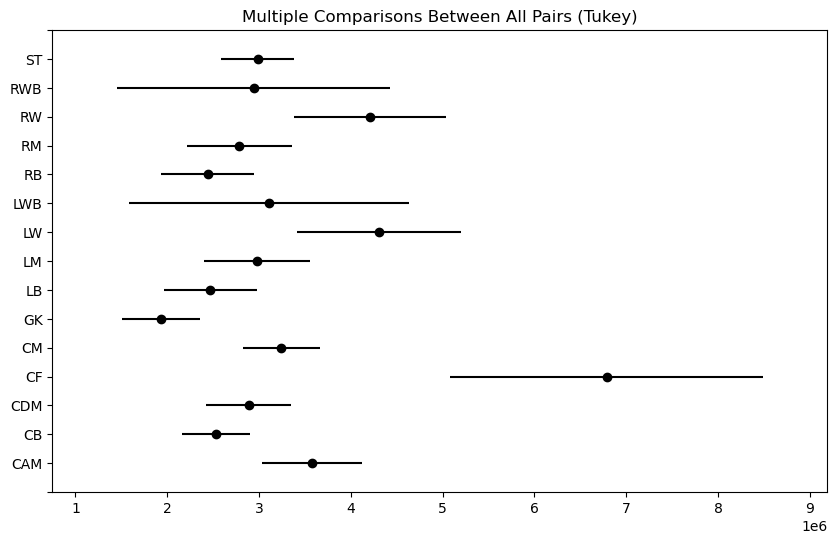

In [154]:
result.plot_simultaneous()

In [155]:
position_group_1 = ["ST","RWB","RM","RB","LWB","LM","LB","GK","CM","CDM","CB"]
position_group_2 = ["RW","LW","CAM"]

In [156]:
df.loc[df["first_position"].isin(position_group_1), "first_position_g_1"] = 1
df.loc[df["first_position"].isin(position_group_2), "first_position_g_2"] = 1

In [157]:
df["first_position_g_1"].fillna(0,inplace=True)
df["first_position_g_2"].fillna(0,inplace=True)

In [158]:
df.drop("first_position",axis=1,inplace=True)

In [159]:
str_list

['long_name',
 'preferred_foot',
 'body_type',
 'first_position',
 'new_age_cat',
 'release_clause_eur_cat',
 'league_group',
 'work_rate_cat']

In [160]:
df.drop("preferred_foot",axis=1,inplace=True)

In [161]:
df.groupby("body_type").agg({"value_eur":"mean"}).sort_values(by="value_eur",ascending=False)

,value_eur
body_type,
Unique,5.300581e+07
Stocky (170-185),3.034016e+06
Stocky (185+),2.988510e+06
Stocky (170-),2.966340e+06
Lean (170-185),2.610178e+06
Lean (185+),2.547061e+06
Normal (170-),2.507912e+06
Normal (185+),2.473829e+06
Normal (170-185),2.391024e+06


In [162]:
df.drop("body_type",axis=1,inplace=True)

In [163]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,new_age_cat,release_clause_eur_cat,league_group,work_rate_cat,foot_right,first_position_g_1,first_position_g_2
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,1.0,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,Exp.Players,High_Release_Eur,top_7_league,Low_Work_Rate,0.0,0.0,1.0
1,Robert Lewandowski,92,92,119500000.0,270000.0,1.0,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,Exp.Players,High_Release_Eur,top_7_league,High_Work_Rate,1.0,1.0,0.0
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,1.0,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,Veteran,High_Release_Eur,top_7_league,Medium_Work_Rate,1.0,1.0,0.0
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,1.0,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate,1.0,0.0,1.0
4,Kevin De Bruyne,91,91,125500000.0,350000.0,1.0,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,Mature Players,High_Release_Eur,top_7_league,High_Work_Rate,1.0,1.0,0.0


In [164]:
df = pd.get_dummies(df, columns=['new_age_cat','release_clause_eur_cat','league_group',
                                      'work_rate_cat'], drop_first=True, dtype="int64")

In [165]:
df.head()

,long_name,overall,potential,value_eur,wage_eur,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,multi_position,goalkeeper,Both_Foot,mean_score_attack,mean_score_midfielder,mean_score_defender,mean_score_goalkeeper,Face,foot_right,first_position_g_1,first_position_g_2,new_age_cat_Young Talent,new_age_cat_Mature Players,new_age_cat_Exp.Players,new_age_cat_Veteran,release_clause_eur_cat_Low_Release_Eur,release_clause_eur_cat_Average_Release_Eur,release_clause_eur_cat_High_Release_Eur,league_group_top_7_league,league_group_top_8_18_league,work_rate_cat_Low_Work_Rate,work_rate_cat_Medium_Work_Rate
0,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,1.0,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0,1,0.0,1.0,92.583333,90.75,62.6,22,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,1,0,1,0
1,Robert Lewandowski,92,92,119500000.0,270000.0,1.0,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0,0,0.0,1.0,88.666667,84.00,65.8,22,1.0,1.0,1.0,0.0,0,0,1,0,0,0,1,1,0,0,0
2,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,1.0,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0,1,0.0,1.0,89.333333,83.00,61.2,23,1.0,1.0,1.0,0.0,0,0,0,1,0,0,1,1,0,0,1
3,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,1.0,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0,1,0.0,1.0,88.833333,86.50,62.7,23,1.0,1.0,0.0,1.0,0,1,0,0,0,0,1,1,0,0,0
4,Kevin De Bruyne,91,91,125500000.0,350000.0,1.0,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0,1,0.0,1.0,88.250000,91.00,78.5,24,1.0,1.0,1.0,0.0,0,1,0,0,0,0,1,1,0,0,0


In [166]:
#df.to_csv("ready_to_model.csv",index=False)

In [167]:
df.shape

(19165, 72)